In [1]:
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import constants_prepare as c

# Key takeaways:
- Shell represents 0.53 of the readme
- median wordcount is 150, but the top ten languages all had median wordcounts about 50 words more
    - note: this is after cleaning
- 43724 unique words in the cleaned corpus
- python was not more associated with raspberry pi, but `rasp` shows up a lot (over 500 times)
- median number of unique words was 96
    - again the top ten languages had a median number of unique words that was higher than the overall median

- "install" and "use" represent about 0.03 of the corpus

In [2]:
df_debian = pd.read_json('debian_data.json')
df_debian

,repo,language,readme_contents
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...
...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...


In [3]:
debian_corpus = ' '.join(df_debian['readme_contents'])
debian_corpus[:100]

'# Packer templates for Debian written in legacy JSON\n\n### Overview\n\nThis repository contains Packer '

In [4]:
debian_corpus_list = c.clean_data(debian_corpus)
debian_corpus_list[:10]

['packer',
 'templat',
 'written',
 'legaci',
 'json',
 'overview',
 'repositori',
 'contain',
 'packer',
 'templat']

# What are the most common languages for these readmes?

Text(0.5, 1.0, 'Count of languages in dataframe')

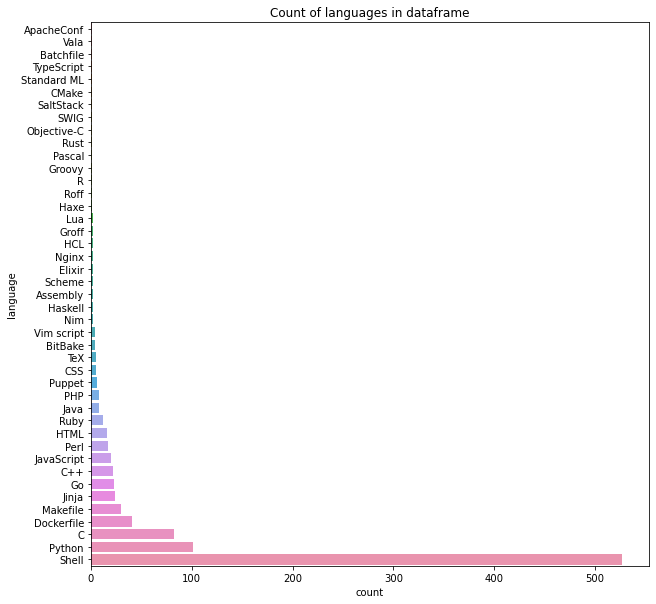

In [5]:
plt.figure(figsize = (10,10))
sns.countplot(data=df_debian, y = 'language', order=df_debian.groupby('language').size().sort_values().index)
plt.title('Count of languages in dataframe')

In [6]:
# ten most common languages
pd.concat([df_debian.language.value_counts(),df_debian.language.value_counts(normalize=True)], axis = 1)

,language,language
Shell,527,0.533401
Python,101,0.102227
C,82,0.082996
Dockerfile,41,0.041498
Makefile,30,0.030364
Jinja,24,0.024291
Go,23,0.023279
C++,22,0.022267
JavaScript,20,0.020243
Perl,17,0.017206


# How long is a typical readme in clean wordcount?

In [16]:
df_debian['length_of_readme'] = df_debian['readme_contents'].apply(lambda r : len(c.clean_data(r)))

<AxesSubplot:>

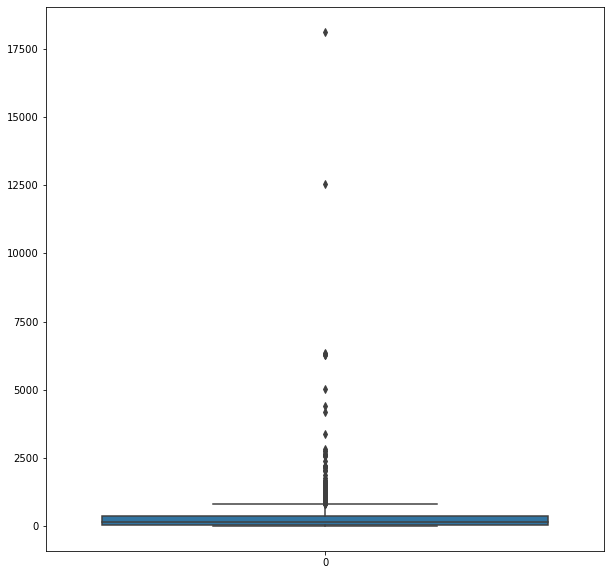

In [26]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df_debian.length_of_readme)

In [30]:
df_debian.length_of_readme.describe()

count     1100.000000
mean       366.887273
std        903.390805
min          0.000000
25%         53.000000
50%        149.500000
75%        362.000000
max      18116.000000
Name: length_of_readme, dtype: float64

<AxesSubplot:xlabel='length_of_readme', ylabel='language'>

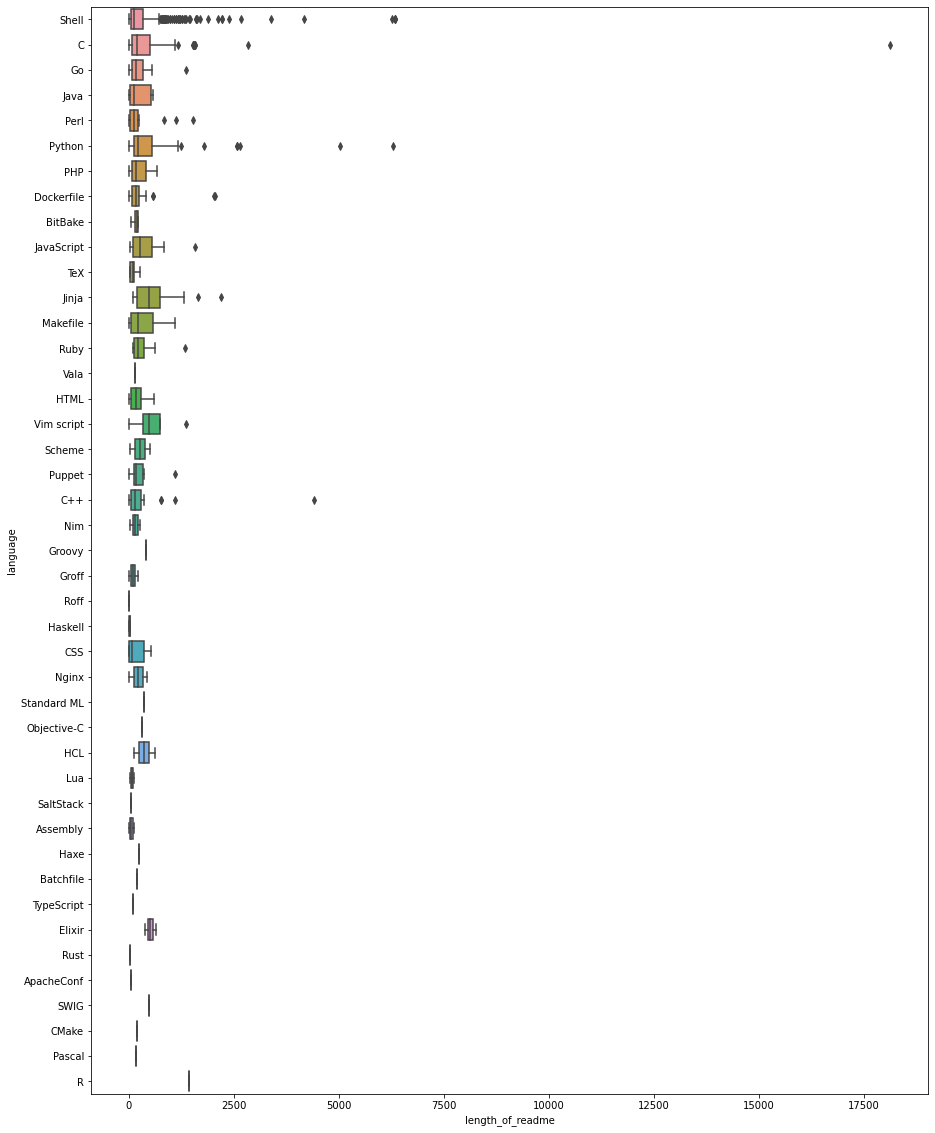

In [24]:
plt.figure(figsize = (15,20))
sns.boxplot(data = df_debian, x = 'length_of_readme', y='language')

In [94]:
sort_column = '50%'
df_debian.groupby('language').length_of_readme.describe().sort_values(sort_column, ascending=False)[sort_column].nlargest(10)

language
R              1429.0
Elixir          509.5
Vim script      488.0
SWIG            466.0
Jinja           464.5
Groovy          394.0
HCL             361.0
Standard ML     360.0
Objective-C     309.0
Scheme          263.5
Name: 50%, dtype: float64

In [40]:
#longest readme is actually a boot program
df_debian[df_debian['length_of_readme'] == 18116]

,repo,language,readme_contents,length_of_readme
288,TinkerBoard/debian_u-boot,C,#\n# (C) Copyright 2000 - 2013\n# Wolfgang Den...,18116


In [41]:
#count of repos with no readme
df_debian[df_debian['length_of_readme'] == 0].shape

(57, 4)

# Number of unique words in corpus

In [75]:
debian_corpus_series = pd.Series(debian_corpus_list)
pd.Series(debian_corpus_list).nunique()

43724

In [57]:
pd.Series(debian_corpus_list).value_counts().nlargest(20)

instal      6130
use         5922
file        3706
packag      3657
run         3142
build       2635
version     2198
system      2190
default     2137
configur    2134
set         2072
script      2043
imag        1987
make        1909
support     1761
need        1694
kernel      1680
option      1662
1           1619
updat       1599
dtype: int64

# Python corpus

In [61]:
python_corpus = c.clean_data(' '.join(df_debian[df_debian.language == 'Python'].readme_contents))
python_corpus[:10]

['dhvirtualenv',
 'build',
 'statu',
 'doc',
 'content',
 'overviewoverview',
 'present',
 'blog',
 'resourcespresentationsblogsotherresourc',
 'use']

In [66]:
pd.Series(python_corpus).value_counts().nlargest(20)

use         853
packag      767
instal      686
file        581
build       436
python      392
run         317
version     307
download    284
see         268
default     267
option      258
imag        235
configur    232
command     222
need        215
updat       214
system      211
support     211
sourc       202
dtype: int64

In [74]:
python_corpus_series = pd.Series(python_corpus)
python_corpus_series[python_corpus_series.str.contains('rasp')].count()

8

In [76]:
debian_corpus_series[debian_corpus_series.str.contains('rasp')].count()

502

# Make a clean readme contents column

In [78]:
df_debian['clean_readme'] = df_debian.readme_contents.apply(c.clean_data)
df_debian

,repo,language,readme_contents,length_of_readme,clean_readme
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...,423,"[packer, templat, written, legaci, json, overv..."
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...,155,"[deepin, wine, deepinwin, ubuntudebian, deepin..."
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...,6322,"[notic, notifi, statement, openfan, termin, co..."
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...,277,"[displaylinkdebian, displaylink, driver, insta..."
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...,60,"[shadowsock, auto, instal, shadowsock, server,..."
...,...,...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...,90,"[broinstal, instal, script, bro, id, base, sys..."
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...,17,"[wget, tar, xzvf, nginx_141origtargz, cd, ngin..."
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...,1161,"[pluggabl, authent, modul, pam, univers, 2nd, ..."
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...,418,"[yubico, univers, 2nd, factor, u2f, server, c,..."


In [79]:
df_debian['total_unique_words'] = df_debian['clean_readme'].apply(lambda r : pd.Series(r).nunique())
df_debian

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_3013/3822713239.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_debian['total_unique_words'] = df_debian['clean_readme'].apply(lambda r : pd.Series(r).nunique())


,repo,language,readme_contents,length_of_readme,clean_readme,total_unique_words
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...,423,"[packer, templat, written, legaci, json, overv...",216
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...,155,"[deepin, wine, deepinwin, ubuntudebian, deepin...",85
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...,6322,"[notic, notifi, statement, openfan, termin, co...",1638
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...,277,"[displaylinkdebian, displaylink, driver, insta...",171
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...,60,"[shadowsock, auto, instal, shadowsock, server,...",29
...,...,...,...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...,90,"[broinstal, instal, script, bro, id, base, sys...",69
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...,17,"[wget, tar, xzvf, nginx_141origtargz, cd, ngin...",17
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...,1161,"[pluggabl, authent, modul, pam, univers, 2nd, ...",455
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...,418,"[yubico, univers, 2nd, factor, u2f, server, c,...",232


# distibution of unique words for each language

In [80]:
df_debian.total_unique_words.describe()

count    1100.000000
mean      164.340909
std       242.045272
min         0.000000
25%        40.000000
50%        96.000000
75%       203.000000
max      3605.000000
Name: total_unique_words, dtype: float64

In [98]:
df_debian.groupby('language').total_unique_words.describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
Shell,527.0,150.643264,215.233064,0.0,38.00,82.0,190.50,2224.0
Python,101.0,212.693069,246.321893,0.0,75.00,133.0,290.00,1647.0
C,82.0,235.853659,425.709433,0.0,56.00,122.5,286.75,3605.0
Dockerfile,41.0,132.365854,169.694395,6.0,53.00,97.0,126.00,877.0
Makefile,30.0,167.533333,148.614923,0.0,39.00,136.0,307.25,516.0
Jinja,24.0,269.750000,184.198912,63.0,126.25,235.5,335.25,768.0
Go,23.0,142.347826,134.232366,0.0,60.00,123.0,189.00,620.0
C++,22.0,191.272727,314.777802,1.0,41.50,108.5,163.75,1474.0
JavaScript,20.0,178.800000,134.596708,16.0,67.75,155.0,276.25,436.0


In [85]:
#max unique words is u-boot for a tinker board
df_debian[df_debian.total_unique_words==3605]

,repo,language,readme_contents,length_of_readme,clean_readme,total_unique_words
288,TinkerBoard/debian_u-boot,C,#\n# (C) Copyright 2000 - 2013\n# Wolfgang Den...,18116,"[c, copyright, 2000, 2013, wolfgang, denk, den...",3605


<AxesSubplot:>

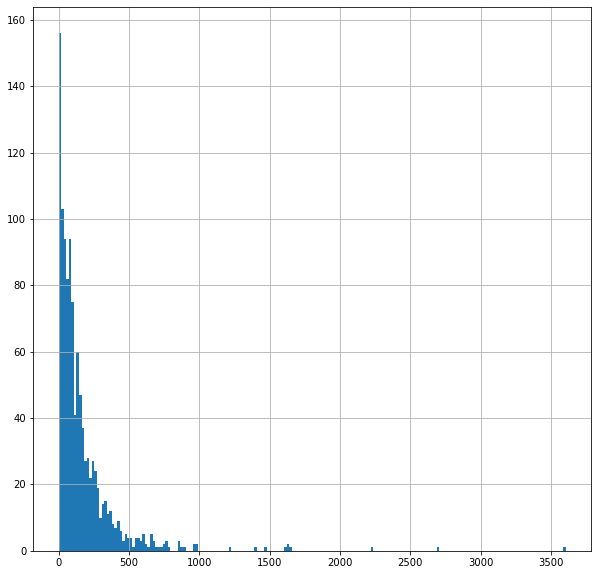

In [93]:
plt.figure(figsize = (10, 10))
df_debian.total_unique_words.hist(bins = 200)

# Most common words and ngrams

In [104]:
pd.concat([debian_corpus_series.value_counts(), debian_corpus_series.value_counts(normalize=True)], axis = 1).head(10)

,0,1
instal,6130,0.015191
use,5922,0.014676
file,3706,0.009184
packag,3657,0.009063
run,3142,0.007786
build,2635,0.006530
version,2198,0.005447
system,2190,0.005427
default,2137,0.005296
configur,2134,0.005288


In [151]:
languages = df_debian.language.unique().tolist()
languages = ['all'] + languages[:languages.index(None)] + languages[languages.index(None)+1:]

In [152]:
print(languages)

['all', 'Shell', 'C', 'Go', 'Java', 'Perl', 'Python', 'PHP', 'Dockerfile', 'BitBake', 'JavaScript', 'TeX', 'Jinja', 'Makefile', 'Ruby', 'Vala', 'HTML', 'Vim script', 'Scheme', 'Puppet', 'C++', 'Nim', 'Groovy', 'Groff', 'Roff', 'Haskell', 'CSS', 'Nginx', 'Standard ML', 'Objective-C', 'HCL', 'Lua', 'SaltStack', 'Assembly', 'Haxe', 'Batchfile', 'TypeScript', 'Elixir', 'Rust', 'ApacheConf', 'SWIG', 'CMake', 'Pascal', 'R']


In [156]:
corpora = []
corpora.append({'language':'all', 'corpus':debian_corpus_list})
for lang in languages[1:]:
    corpora.append({'language':lang, 'corpus':c.clean_data(' '.join(df_debian[df_debian.language == lang].readme_contents))})

In [157]:
df_corpora = pd.DataFrame(corpora)
df_corpora

,language,corpus
0,all,"[packer, templat, written, legaci, json, overv..."
1,Shell,"[packer, templat, written, legaci, json, overv..."
2,C,"[deepin, wine, deepinwin, ubuntudebian, deepin..."
3,Go,"[aptli, imag, target, imag, target, imag, targ..."
4,Java,"[gnurootdebian, repositori, correspond, gnuroo..."
5,Perl,"[note, repo, date, im, use, histor, reason, on..."
6,Python,"[dhvirtualenv, build, statu, doc, content, ove..."
7,PHP,"[releas, 285, raspap, featurerich, wireless, r..."
8,Dockerfile,"[whale, erpnext, docker, build, statu, goal, r..."
9,BitBake,"[metadebian, metadebian, set, recip, metadata,..."


In [162]:
corpora_series = []
for corpus in corpora:
    corpora_series.append(pd.Series(corpus['corpus']).value_counts())
    
word_counts = pd.concat(corpora_series, axis = 1)
word_counts = word_counts.set_axis(languages, axis = 1).fillna(0).apply(lambda s: s.astype(int))

In [163]:
word_counts

,all,Shell,C,Go,Java,Perl,Python,PHP,Dockerfile,BitBake,...,Haxe,Batchfile,TypeScript,Elixir,Rust,ApacheConf,SWIG,CMake,Pascal,R
instal,6130,3098,380,76,27,103,686,60,65,0,...,3,0,1,10,0,1,6,0,1,0
use,5922,2304,908,92,23,86,853,35,211,6,...,2,0,1,7,0,0,9,0,1,5
file,3706,1405,425,71,35,91,581,13,85,4,...,0,6,3,13,1,2,11,3,1,0
packag,3657,1249,191,126,37,143,767,0,32,7,...,1,0,1,15,1,0,0,9,3,1
run,3142,1636,267,85,18,42,317,2,137,9,...,0,2,0,14,0,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
freeswitchmw,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ericsysminsystem,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dfsg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gotham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# What words are not associated with a language?

-  zabbix  is not in shell, but is in python
- tdtd, intelr, pi and math were really common in shell

In [183]:
#find difference between shell and all

word_counts[(word_counts['all'] != 0) & (word_counts['Go'] == 0)].head(10)

,all,Shell,C,Go,Java,Perl,Python,PHP,Dockerfile,BitBake,...,Haxe,Batchfile,TypeScript,Elixir,Rust,ApacheConf,SWIG,CMake,Pascal,R
devic,777,337,289,0,0,1,54,9,10,0,...,0,0,0,0,0,0,0,0,0,0
consol,480,133,40,0,1,0,10,0,23,0,...,0,0,0,0,0,0,0,0,0,0
f,472,84,14,0,0,0,33,0,3,0,...,0,0,0,0,0,0,0,0,0,11
tdtd,442,438,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chmod,413,124,8,0,0,1,11,0,2,0,...,0,0,0,0,0,0,0,0,0,0
intelr,369,367,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
usb,361,188,69,0,0,0,18,2,0,0,...,0,0,0,0,0,0,0,0,0,0
tr,354,114,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
edit,343,179,36,0,0,2,20,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,340,172,34,0,0,1,38,0,11,1,...,0,2,0,1,0,0,0,0,0,8
